# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [15]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [16]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [18]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    area = (x_lim[1]-x_lim[0])*(y_lim[1]-y_lim[0])
    n = area*intensity
    number = np.random.poisson(n)
    x = np.random.uniform(low = x_lim[0], high = x_lim[1], size = number)
    y = np.random.uniform(low = y_lim[0], high = y_lim[1], size = number)
    
    points = pd.DataFrame()
    points['X'] = x
    points['Y'] = y
    return points
    #raise NotImplementedError()
    
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    """
    Parameters
    -------
    intensity_function: function
        Funkcja przyjmująca dwa argumenty (macierz 1D współrzędnych X i macierz 1D współrzędnych Y) i zwracająca macierz 1D
        z wartościami funkcji opisującej intensywność procesu dla tych współrzędnych.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10] 
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    def g(x):
        return -funkcja(x[0], x[1])
    intensity=-sp.optimize.minimize(g, x0=[(x_lim[0]+x_lim[1])/2, (y_lim[0]+y_lim[1])/2], bounds=[x_lim, y_lim]).fun
    poisson = homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim)
    dlugosc = len(poisson)
    
    for i in range(dlugosc):
        prawdopodobienstwo = 1 - (funkcja(poisson['X'][i], poisson['Y'][i])/intensity)
        if prawdopodobienstwo > np.random.uniform(0,1):
            poisson = poisson.drop(i)
    return poisson
    #raise NotImplementedError()   
    
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    x_lim_2 = [x_lim[0] - cluster_radius, x_lim[1] + cluster_radius]
    y_lim_2 = [y_lim[0] - cluster_radius, y_lim[1] + cluster_radius]
    punkty_parent = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_2, y_lim_2)
    x = punkty_parent['X']
    y = punkty_parent['Y']
    koncowe_x = np.array([])
    koncowe_y = np.array([])
    
    for i in range(len(punkty_parent)):
        daughter_poisson = homogeneous_poisson_on_rectangle(daughter_intensity, [x[i]-cluster_radius, x[i]+cluster_radius], [y[i]-cluster_radius, y[i]+cluster_radius])
        punkty_X_daughter = daughter_poisson['X']
        punkty_Y_daughter = daughter_poisson['Y']
    
        for j in range(len(daughter_poisson)):
            if ((punkty_X_daughter[j]-x[i])**2 + (punkty_Y_daughter[j]-y[i])**2) > cluster_radius**2:
                punkty_Y_daughter = punkty_Y_daughter.drop(j)
                punkty_X_daughter = punkty_X_daughter.drop(j)
        koncowe_x = np.append(koncowe_x, punkty_X_daughter)
        koncowe_y = np.append(koncowe_y, punkty_Y_daughter)
    XY = {'X' : koncowe_x, 'Y' : koncowe_y}
    punkty = pd.DataFrame(data = XY)
    return punkty
    #raise NotImplementedError()
    
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    mean_cluster_size: float
        Liczba dodatnia określająca oczekiwaną liczebność generowanych klastrów.
    cluster_sigma: float
        Liczba dodatnia określająca odchylenie standardowe rozkładu wykorzystywanego w procesie generowania klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    x_lim_2 = [0,0]
    y_lim_2 = [0,0]
    x_lim_2[0] = x_lim[0]-4*cluster_sigma
    x_lim_2[1] = x_lim[1]+4*cluster_sigma
    y_lim_2[0] = y_lim[0]-4*cluster_sigma
    y_lim_2[1] = y_lim[1]+4*cluster_sigma
    punkty_poisson = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_2, y_lim_2)
    
    koncowe_x = np.array([])
    koncowe_y = np.array([])
    
    for i in range(len(punkty_poisson)):
        randomowa_liczba_poissona = np.random.poisson(mean_cluster_size)
        losowy_x = np.random.normal(punkty_poisson['X'][i], cluster_sigma, randomowa_liczba_poissona)
        losowy_y = np.random.normal(punkty_poisson['Y'][i], cluster_sigma, randomowa_liczba_poissona)
        koncowe_x = np.append(koncowe_x, losowy_x)
        koncowe_y = np.append(koncowe_y, losowy_y)
    XY = {'X' : koncowe_x, 'Y': koncowe_y}
    punkty = pd.DataFrame(data = XY)
    for i in range(len(punkty)):
        if punkty['X'][i] < x_lim[0] or punkty['X'][i] > x_lim[1] or punkty['Y'][i] < y_lim[0] or punkty['Y'][i] > y_lim[1]:
            punkty.drop(i)
    return punkty
    #raise NotImplementedError()    
# YOUR CODE HERE
import math as m
#raise NotImplementedError()

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [19]:
# YOUR CODE HERE
poisson = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
poisson 

def funkcja(x,y):
    return 10*(m.cos((m.pi/4)*x)+1)
poisson_nieregularny = unhomogeneous_poisson_on_rectangle(funkcja, [-10,10], [-5,5])
poisson_nieregularny

materna = materna_on_rectangle(0.15, 15, 1.25, [-10,10], [-5,5])
materna

thomas = thomas_on_rectangle(0.3, 20, 0.75, [-10,10], [-5,5])
thomas 


#raise NotImplementedError()

,X,Y
0,-0.287574,1.862028
1,-1.497871,0.702090
2,-0.599709,0.822314
3,0.803630,2.128902
4,0.104730,1.326517
...,...,...
2509,-7.826185,1.615874
2510,-7.630932,0.082371
2511,-7.290235,0.621973
2512,-7.764000,1.087834


### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [20]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE
    zliczenia = np.histogram2d(points['X'], points['Y'], bins, [[x_lim[0],x_lim[1]], [y_lim[0], y_lim[1]]])
    zliczenia2 = [zliczenia[0].T, zliczenia[1], zliczenia[2]]
    return zliczenia2
    #raise NotImplementedError()

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    #punkty = point_count_on_subregions(points, bins, x_lim, y_lim)
    wynik = point_count_on_subregions(points, bins, x_lim, y_lim)
    obx = wynik[1]
    oby = wynik[2]
    area = (obx[1]-obx[0])*(oby[1]-oby[0])
    wynik[0] = wynik[0]/area
    wynik_i = [wynik[0], wynik[1], np.transpose(wynik[2])]
    return wynik_i
    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [21]:
# YOUR CODE HERE

HP = pd.read_csv('dane_tymczasowe_HP.csv')
M = pd.read_csv('dane_tymczasowe_M.csv')
T = pd.read_csv('dane_tymczasowe_T.csv')
UP = pd.read_csv('dane_tymczasowe_UP.csv')
HP_int = intensity_on_subregions(HP, [40,20], [-10,10], [-5,5])
M_int = intensity_on_subregions(M, [40,20], [-10,10], [-5,5])
UP_int = intensity_on_subregions(UP, [40,20], [-10,10], [-5,5])
T_int = intensity_on_subregions(T, [40,20], [-10,10], [-5,5])


#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'T')

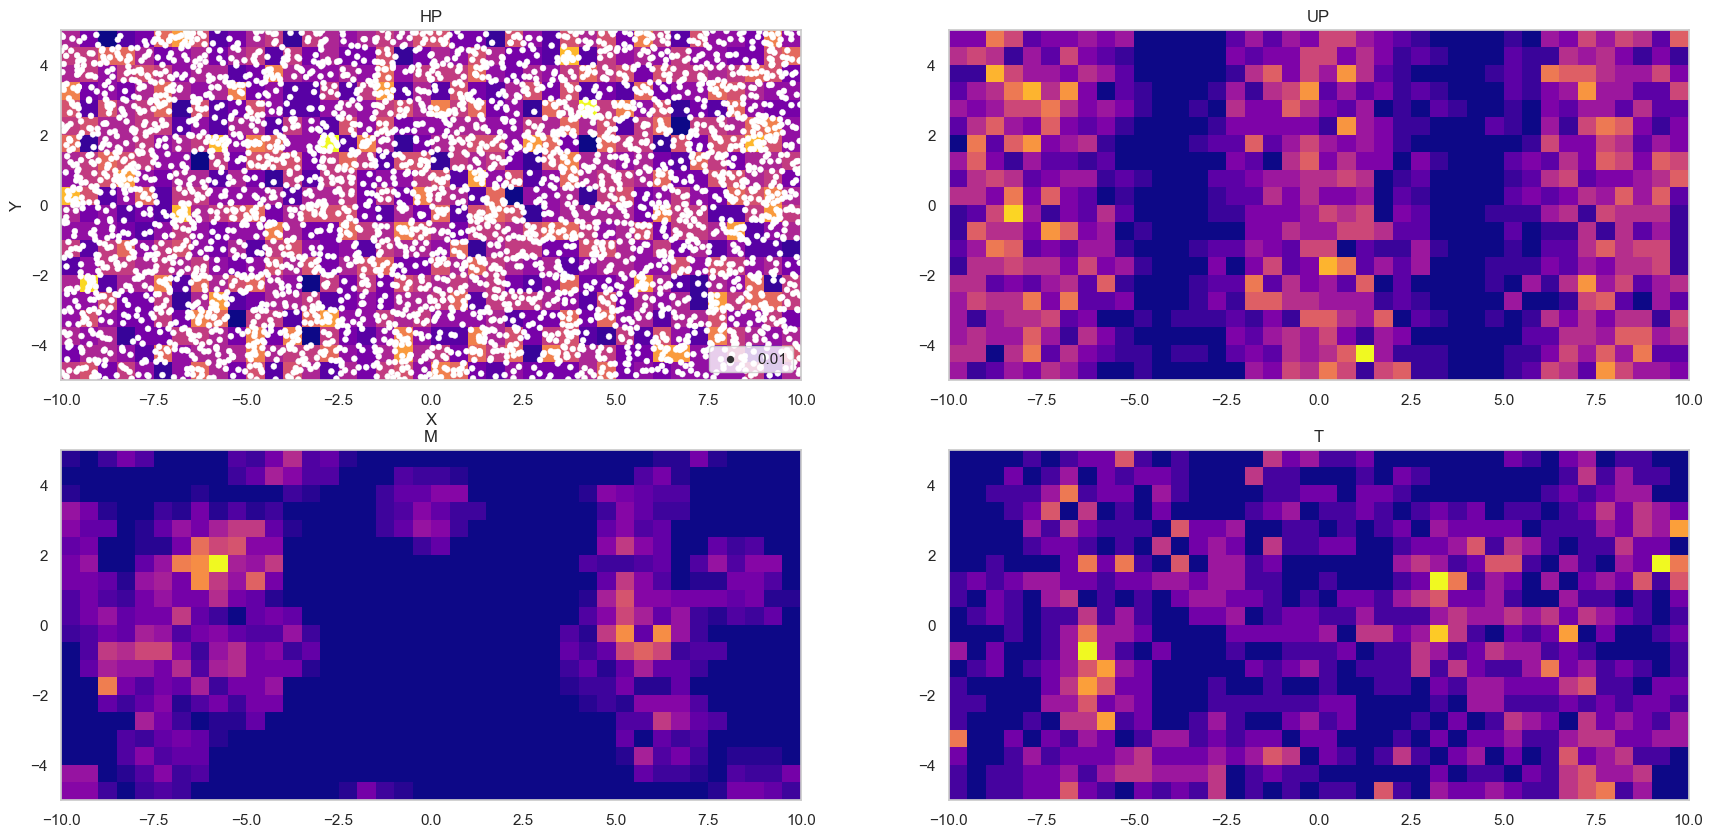

In [22]:
# YOUR CODE HERE
fig, axes = plt.subplots(2,2, figsize = (21,10))
axes[0,0].pcolormesh(HP_int[1], HP_int[2], HP_int[0], cmap = 'plasma')
sns.scatterplot(HP, x = HP['X'], y = HP['Y'], color = 'white', ax = axes[0,0], size = 0.01)
axes[0,0].set_title('HP')
axes[0,1].pcolormesh(UP_int[1], UP_int[2], UP_int[0], cmap = 'plasma')
axes[0,1].set_title('UP')
axes[1,0].pcolormesh(M_int[1], M_int[2], M_int[0], cmap = 'plasma')
axes[1,0].set_title('M')
axes[1,1].pcolormesh(T_int[1], T_int[2], T_int[0], cmap = 'plasma')
axes[1,1].set_title('T')
#raise NotImplementedError()

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [23]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    
    os_x = np.linspace(x_lim[0], x_lim[1], grid[0])
    os_y = np.linspace(y_lim[0], y_lim[1], grid[1])
    x, y = np.meshgrid(os_x, os_y, indexing='ij')
    centrum_x = x.flatten()
    centrum_y = y.flatten()
    
    wsp_x = points["X"].to_numpy()
    wsp_y = points["Y"].to_numpy()
    dlug_x = len(wsp_x)
    dlug_y = len(wsp_y)
    
    intensity = np.array([])
    for i in range(len(centrum_x)):
        d = np.sqrt((wsp_x - centrum_x[i])**2+(wsp_y - centrum_y[i])**2)
        mask_d = np.ma.masked_greater_equal(d, kernel_radius)
        d2 = (3 / (np.pi * kernel_radius**2)) * ((1 - (mask_d**2) / (kernel_radius**2)))**2
        intens_kernel = d2.sum()
        intensity = np.append(intensity, intens_kernel)
    XY = {"X":centrum_x, "Y":centrum_y, "I":intensity}
    intensity_data = pd.DataFrame(data=XY)
    return(intensity_data)

    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [24]:
# YOUR CODE HERE
intensity_hg_kde = intensity_on_kde(poisson, 1.5, [200, 100], [-10, 10], [-5, 5])
intensity_ug_kde = intensity_on_kde(poisson_nieregularny, 1.5, [200, 100], [-10, 10], [-5, 5])
intensity_m_kde = intensity_on_kde(materna, 1.5, [200, 100], [-10, 10], [-5, 5])
intensity_t_kde = intensity_on_kde(thomas, 1.5, [200, 100], [-10, 10], [-5, 5])
#raise NotImplementedError()

#### c) Wizualizacja

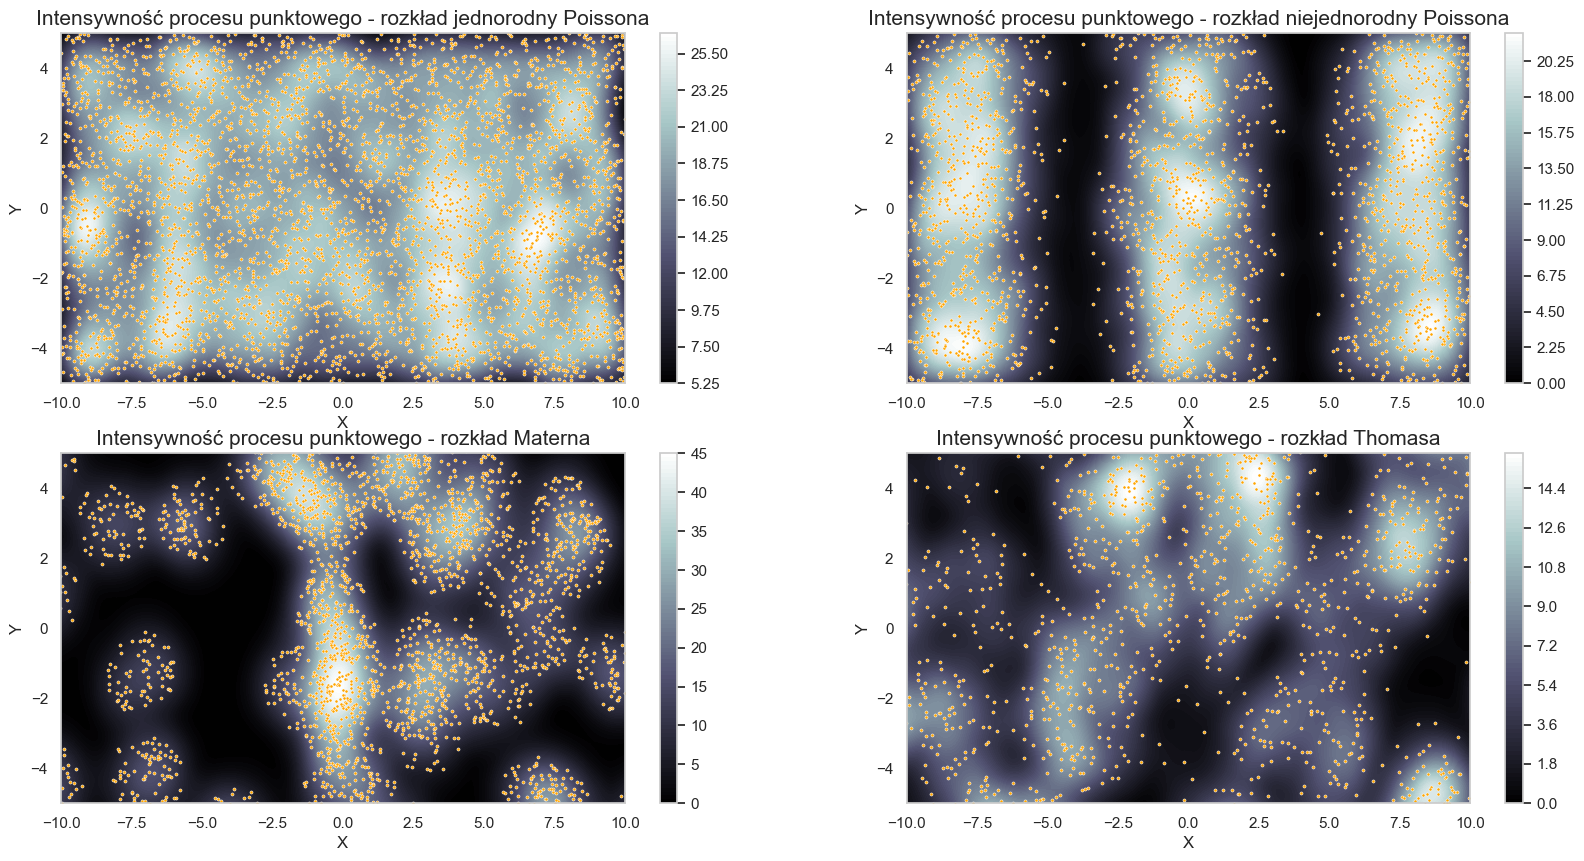

In [25]:
# YOUR CODE HERE
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
wykres_kde_1 = axs[0, 0].tricontourf(intensity_hg_kde["X"], intensity_hg_kde["Y"], intensity_hg_kde["I"], levels = 100, cmap = "bone")
axs[0, 0].set_title("Intensywność procesu punktowego - rozkład jednorodny Poissona", size = 15)
axs[0, 0].set_xlim([-10, 10])
axs[0, 0].set_ylim([-5, 5])
sns.scatterplot(data = poisson, x = "X", y = "Y", marker = ".", s = 20, color = "orange", ax = axs[0, 0])
fig.colorbar(wykres_kde_1, ax = axs[0, 0])
wykres_kde_2 = axs[0, 1].tricontourf(intensity_ug_kde["X"], intensity_ug_kde["Y"], intensity_ug_kde["I"], levels = 100, cmap = "bone")
axs[0, 1].set_title("Intensywność procesu punktowego - rozkład niejednorodny Poissona", size = 15)
axs[0, 1].set_xlim([-10, 10])
axs[0, 1].set_ylim([-5, 5])
sns.scatterplot(data = poisson_nieregularny, x = "X", y = "Y", marker = ".", s = 20, color = "orange", ax = axs[0, 1])
fig.colorbar(wykres_kde_2, ax = axs[0, 1])
wykres_kde_3 = axs[1, 0].tricontourf(intensity_m_kde["X"], intensity_m_kde["Y"], intensity_m_kde["I"], levels = 100, cmap = "bone")
axs[1, 0].set_title("Intensywność procesu punktowego - rozkład Materna", size = 15)
axs[1, 0].set_xlim([-10, 10])
axs[1, 0].set_ylim([-5, 5])
sns.scatterplot(data = materna, x = "X", y = "Y", marker = ".", s = 20, color = "orange", ax = axs[1, 0])
fig.colorbar(wykres_kde_3, ax = axs[1, 0])
wykres_kde_4 = axs[1, 1].tricontourf(intensity_t_kde["X"], intensity_t_kde["Y"], intensity_t_kde["I"], levels = 100, cmap = "bone")
axs[1, 1].set_title("Intensywność procesu punktowego - rozkład Thomasa", size = 15)
axs[1, 1].set_xlim([-10, 10])
axs[1, 1].set_ylim([-5, 5])
sns.scatterplot(data = thomas, x = "X", y = "Y", marker = ".", s = 20, color = "orange", ax = axs[1, 1])
fig.colorbar(wykres_kde_4, ax = axs[1, 1])
plt.show()
#raise NotImplementedErrorT